In [ ]:
#For dataset @ https://finance.yahoo.com/quote/MSFT/history/


In [48]:
import pandas as pd
df = pd.read_csv('/content/RELIANCE.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [49]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6714,2024-01-22,154.779999
6715,2024-01-23,156.020004
6716,2024-01-24,156.869995
6717,2024-01-25,157.750000


In [50]:
df['Date']

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6714    2024-01-22
6715    2024-01-23
6716    2024-01-24
6717    2024-01-25
6718    2024-01-26
Name: Date, Length: 6719, dtype: object

In [51]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [52]:
df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6714,2024-01-22,154.779999
6715,2024-01-23,156.020004
6716,2024-01-24,156.869995
6717,2024-01-25,157.750000


In [53]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6714   2024-01-22
6715   2024-01-23
6716   2024-01-24
6717   2024-01-25
6718   2024-01-26
Name: Date, Length: 6719, dtype: datetime64[ns]

In [54]:
df.index = df.pop('Date')
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2024-01-22,154.779999
2024-01-23,156.020004
2024-01-24,156.869995


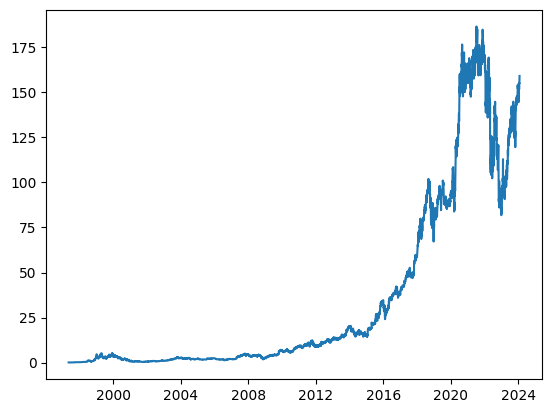

In [55]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [56]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2023-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,155.543503,156.875000,154.353500,152.313004
1,2021-03-26,156.875000,154.353500,152.313004,152.601501
2,2021-03-29,154.353500,152.313004,152.601501,153.786499
3,2021-03-30,152.313004,152.601501,153.786499,152.764496
4,2021-03-31,152.601501,153.786499,152.764496,154.703995
...,...,...,...,...,...
498,2023-03-17,94.879997,96.199997,100.040001,98.949997
499,2023-03-20,96.199997,100.040001,98.949997,97.709999
500,2023-03-21,100.040001,98.949997,97.709999,100.610001
501,2023-03-22,98.949997,97.709999,100.610001,98.699997


In [57]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((503,), (503, 3, 1), (503,))

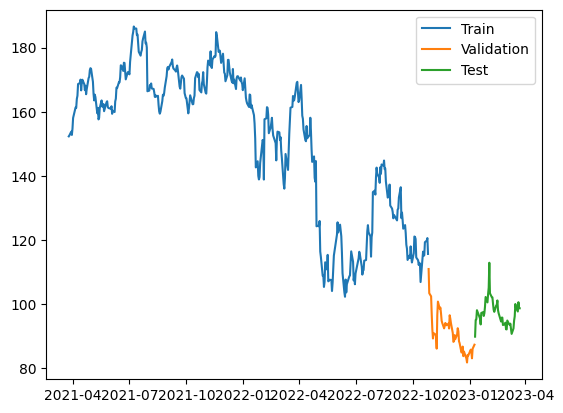

In [58]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 56ms/step - loss: 23199.4297 - mean_absolute_error: 150.5337 - val_loss: 8177.4131 - val_mean_absolute_error: 90.2345
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 22917.3027 - mean_absolute_error: 149.5929 - val_loss: 7973.8350 - val_mean_absolute_error: 89.0991
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 22501.3203 - mean_absolute_error: 148.1940 - val_loss: 7655.9180 - val_mean_absolute_error: 87.2963
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 21874.2305 - mean_absolute_error: 146.0589 - val_loss: 7153.7441 - val_mean_absolute_error: 84.3698
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 20822.6367 - mean_absolute_error: 142.4013 - val_loss: 6334.1211 - val_mean_absolute_error: 79.3609
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 19171.9609 - mean_absolute_error: 136.4408 - val_loss: 498

13/13 [==============================] - 1s 5ms/step


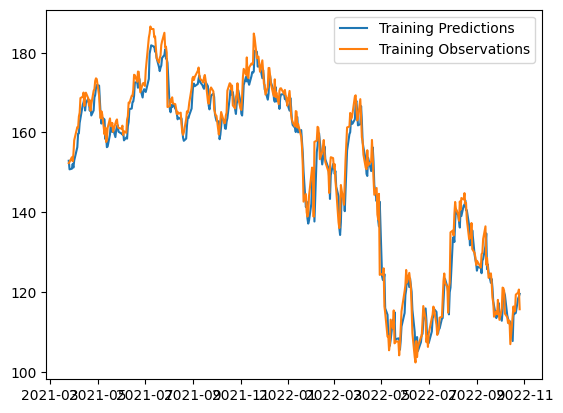

In [60]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 6ms/step


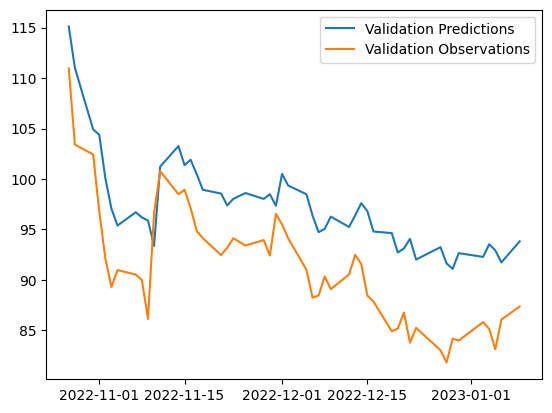

In [61]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 7ms/step


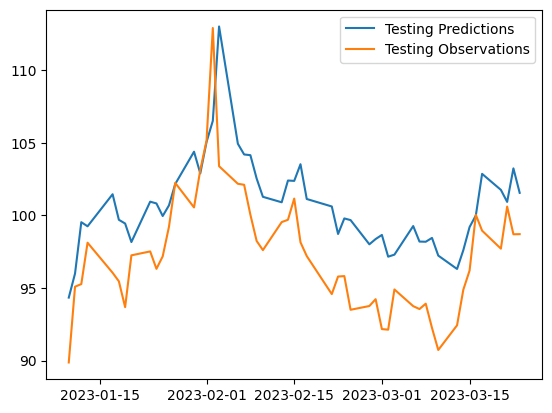

In [62]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

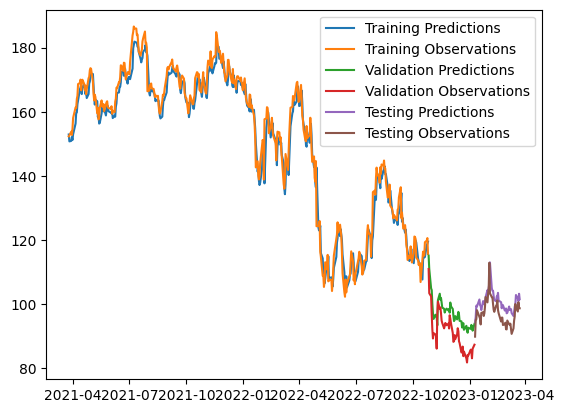

In [63]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [64]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


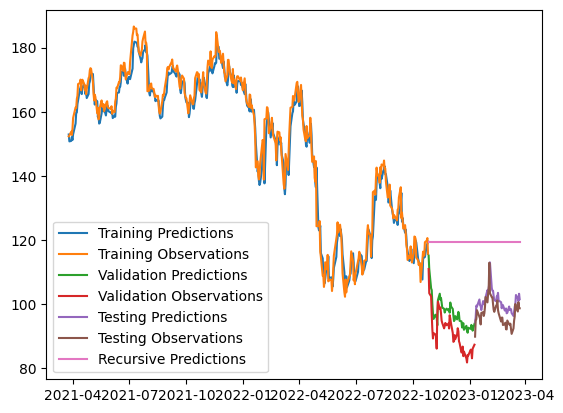

In [65]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])